<a href="https://colab.research.google.com/github/LeninGF/CoursesNotes/blob/main/InteligenciaArtificalGenerativa/Problems/LSTM-GRU/EjercicioEmbeddingLSTM-GRU-IAG-2024B_LeninFalconi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios sobre Redes Neuronales LSTM y GRU

Coder: Lenin G. Falconí

Asignatura: Tópicos Especiales (Inteligencia Artificial)

Fecha: 2024-11-06

## Problema 1 Comparar One-Hot y Embedding
Analice la representación one-hot y la de embedding. Inicializar las
dependencias necesarias y adaptar el código para usarlo con IMDb Dataset de Movie Reviews.  

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, GRU, LSTM, Dropout

# Parameters
vocab_size = 10000 # 8000
max_text_len = 200
word_vec_dim = 300

print(tf.__version__)

2.17.0


Cargando los datos del IMDB dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train.shape, x_test.shape

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((25000,), (25000,))

Pad sequences

In [ ]:
x_train = pad_sequences(x_train, maxlen=max_text_len)
x_test = pad_sequences(x_test, maxlen=max_text_len)

## Modelo Simple RNN sin embedding

In [ ]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(32, input_shape=(max_tex_len, vocab_size)))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model_rnn.compile(optimizer='adam',
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Entrenar el modelo
history = model_rnn.fit(x_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

# Evaluar el modelo
score = model_rnn.evaluate(x_test, y_test, batch_size=batch_size)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

In [ ]:
model_rnn.summary()

## Modelo Simple RNN con embeddings GloVec

In [ ]:
# prompt: download of flove.6B.100.d.txt

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip
!ls

In [ ]:
# prompt: please a model named model_rnn_globec that is used to classify imbd using simple RNN and an embedding layer from glovec

import numpy as np

# Assuming you have a GloVe embedding file (e.g., glove.6B.100d.txt)
# and a function to load it (load_glove_embeddings)
def load_glove_embeddings(file_path, embedding_dim):
    glove_vector_dict = {}
    with open(file_path, encoding="utf8") as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            glove_vector_dict[word] = coefs

    print("Found %s word vectors." % len(glove_vector_index))
    return glove_vector_dict


In [ ]:
# Load GloVe embeddings
glove_file_path = "glove.6B.100d.txt" # Replace with the actual path
embedding_dim = word_vec_dim # 100
embeddings_index = load_glove_embeddings(glove_file_path, embedding_dim)


In [ ]:
# Create embedding matrix
word_index = imdb.get_word_index()
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [ ]:
# Model with GloVe embeddings
model_rnn_globec = Sequential()
model_rnn_globec.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_text_len, trainable=False))
model_rnn_globec.add(SimpleRNN(32))
model_rnn_globec.add(Dense(1, activation='sigmoid'))

model_rnn_globec.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn_globec.summary()

In [ ]:
Train the model (example)
history = model_rnn_globec.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
# prompt: evaluate model_rnn_globec on test set

# Evaluate the model
score = model_rnn_globec.evaluate(x_test, y_test, batch_size=32)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

## Problema 2 Clasificación de Sentimientos con mayor complejidad

- Se usa una capa Embedding para entrenar a los vectores de palabras en el dataset del ejemplo y
dos LSTM layers para mantener textos más largos. Además se añade una capa densa adicional
antes de la salida.  

- Se usa un modelo pre-entrenado cargando sus pesos con el método `.load_weigths()` de la clase
`keras.models.Sequential`. El modelo fue entrenado con 10 epochs y sus pesos están disponibles en
el archivo `model_weights.h5`.

### Instrucciones

1. Cargar y preparar los datos:
  -  Usar imdb.load_data para obtener el dataset IMDB de Keras, restringido a un vocabulario de tamaño 10000. Luego usar pad_sequences para que todas las secuencias tengan la misma longitud
(max_text_len).
2. Definir el modelo
  - Añadir una capa de Embedding como la primera capa del modelo.
  - Añadir una segunda capa de LSTM con 64 unidades returning las sequences.
  - Añadir una capa Dense de 16 unidades.
3. Entrenar el modelo: Entrenar el modelo con el conjunto de entrenamiento usando 5 épocas y un tamaño de lote de 64, validando el 20% de los datos de cada época.
4. Evaluar el modelo: Guardar los pesos entrenados y evaluar el modelo en el conjunto de prueba imprimiendo la pérdida y la precisión.

In [ ]:
vocab_size = 10000 # 8000
max_text_len = 200
word_vec_dim =100

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train.shape, x_test.shape

((25000,), (25000,))

In [ ]:
x_train = pad_sequences(x_train, maxlen=max_text_len)
x_test = pad_sequences(x_test, maxlen=max_text_len)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=word_vec_dim, input_length=max_text_len, trainable=True, input_shape=(max_text_len,)))
model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
model.add(LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.15))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 200, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 200, 64)             │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,076,321 (4.11 MB)

 Trainable params: 1,076,321 (4.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

# Define the checkpoint callback
checkpoint = ModelCheckpoint('best_model_weights.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - accuracy: 0.6777 - loss: 0.5704
Epoch 1: val_accuracy improved from -inf to 0.84680, saving model to best_model_weights.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 233s 706ms/step - accuracy: 0.6780 - loss: 0.5701 - val_accuracy: 0.8468 - val_loss: 0.3855
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.8641 - loss: 0.3408
Epoch 2: val_accuracy did not improve from 0.84680
313/313 ━━━━━━━━━━━━━━━━━━━━ 243s 674ms/step - accuracy: 0.8641 - loss: 0.3408 - val_accuracy: 0.8456 - val_loss: 0.3623
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.8923 - loss: 0.2760
Epoch 3: val_accuracy did not improve from 0.84680
313/313 ━━━━━━━━━━━━━━━━━━━━ 262s 674ms/step - accuracy: 0.8922 - loss: 0.2760 - val_accuracy: 0.8230 - val_loss: 0.4277
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 639ms/step - accuracy: 0.9120 - loss: 0.2371
Epoch 4: val_accuracy improved from 0.84680 to 0.85300, saving model to best_model_weight

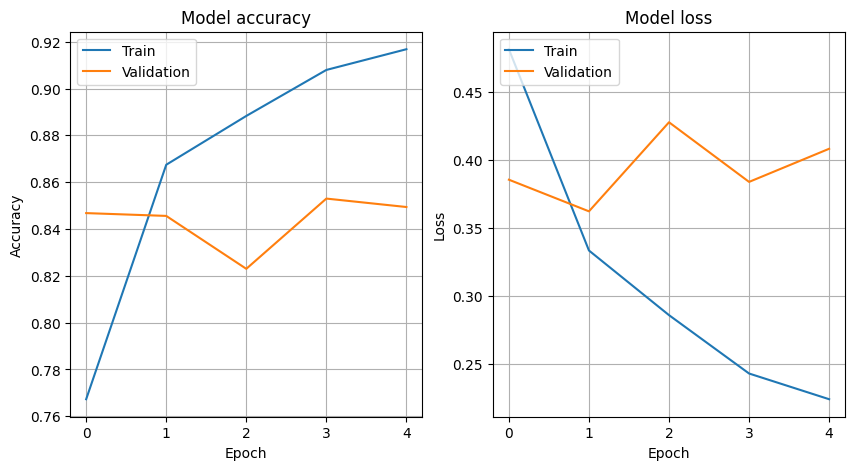

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 160ms/step - accuracy: 0.8406 - loss: 0.3732
Test Loss: 0.36812323331832886
Test Accuracy: 0.8402799963951111


In [ ]:
# prompt: I would like to evaluate my tensorflow model with classification report

from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int) # Convert probabilities to binary predictions

# Generate the classification report
print(classification_report(y_test, y_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 163ms/step
              precision    recall  f1-score   support

           0       0.90      0.76      0.83     12500
           1       0.79      0.92      0.85     12500

    accuracy                           0.84     25000
   macro avg       0.85      0.84      0.84     25000
weighted avg       0.85      0.84      0.84     25000



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/models/IAG2024B/sentiment_classificator.keras')

Presenting some predictions forom dataset

In [ ]:
# prompt: I want to see some of the predictions from the test set. could it be possible to see the text and predict its probability score? could we use random samples from test set

import numpy as np

# Assuming 'x_test' and 'y_test' are defined from the previous code
# and 'word_index' is also available from the imdb dataset loading.

# Reverse the word index to map indices back to words
reverse_word_index = dict([(value, key) for (key, value) in imdb.get_word_index().items()])

# Function to decode a sequence of indices into text
def decode_review(text):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in text])


# Number of samples to display
num_samples = 5

# Generate random indices within the test set
random_indices = np.random.choice(len(x_test), size=num_samples, replace=False)

# Loop through the random samples and print predictions and text
for index in random_indices:
  prediction_probability = model.predict(np.expand_dims(x_test[index], axis=0))
  predicted_class = (prediction_probability > 0.5).astype(int)[0, 0]
  decoded_text = decode_review(x_test[index])
  print(f"Text: {decoded_text}\nPredicted Class: {predicted_class}, Probability: {prediction_probability[0,0]:.4f}\n")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Text: was 13 and since then it has always been my favorite when i'm waiting for a different book to come out this is the book i turn to to fill in the time i have 3 copies for god's sake anyways i knew this was not going to be anything like the book but come on they could have done a little better than this i mean seriously if i wanted to watch american werewolf in paris or london than i would watch those movies they took a perfectly good story and twisted it around into a copy of a story that has been told over and over again and quite frankly i'm tired of watching it i mean hello the best part of the whole f g sorry story is she ends up with gabriel he doesn't die what was that about and he's old in this movie gabriel is supposed to be only 24 not ? da it ? and ? who the he came up with the idea of ? being aunt no no no no ? and vivian hate each other ? anyways yeah that was my little rant serious